# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.6 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
df= pd.read_csv('/content/drive/My Drive/PGP AIML/Python Foundations/Foodhub Case/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape


(1898, 9)

#### Observations: 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: order_id, customer_id, food_preparation_time, and delivery_time are integers; restaurant_name, cusine_type, day_of_the_week, and rating are strings; cost_of_the_order is float


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: No null values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: Minimum is 20, average is 27.37, and maximum is 35 minutes for the food to be prepared.




### **Question 5:** How many orders are not rated?

In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations: 736 orders were not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

In [ ]:

print(len(pd.unique(df['restaurant_name'])))

178


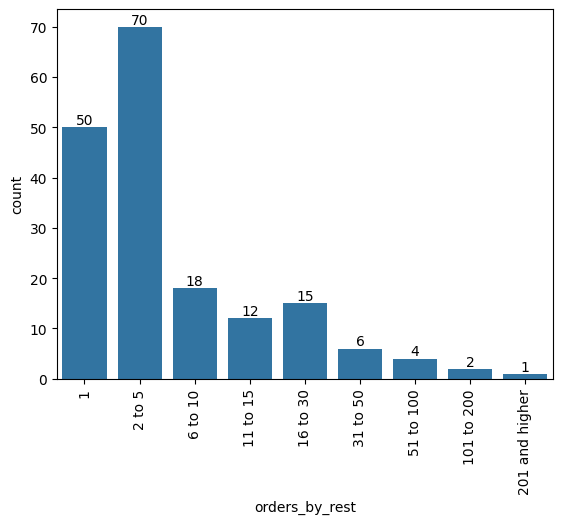

In [ ]:
restaurant_group = pd.cut(df['restaurant_name'].value_counts(), bins=[0, 1, 5, 10, 15, 30, 50, 100, 200, float('Inf')], labels=['1', '2 to 5', '6 to 10', '11 to 15', '16 to 30', '31 to 50', '51 to 100', '101 to 200', '201 and higher'])
df_restaurant_group = pd.DataFrame({'restaurant_name':restaurant_group.index, 'orders_by_rest':restaurant_group.values})
ax = sns.countplot(data=df_restaurant_group, x='orders_by_rest')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

#### Observations: There are many unique restaurants, which makes it unfeasible to have a graph by restaurant name. Therefore, I've grouped restaurants by numbers of rows (orders). 67% of restaurants (120 restaurants) have only between 1 to 5 rows (orders). This means that if a restaurant-level analysis needs to be performed, there would a few restaurants with a significant number of orders. For example, only 13 restaurants have more than 30 orders.

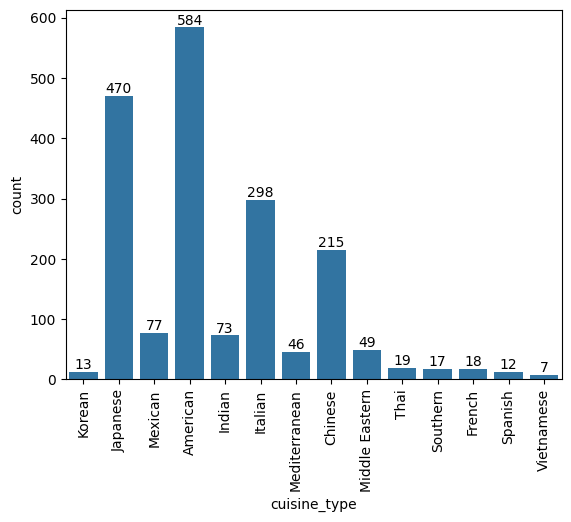

In [ ]:
ax1 = sns.countplot(data=df, x='cuisine_type')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.xticks(rotation=90)
plt.show()


#### Observations: The most popular cuisines (Japanese, American, Italian, and Chinese) range between ~200 and ~600 orders, while other cusines have less than 100 orders each.

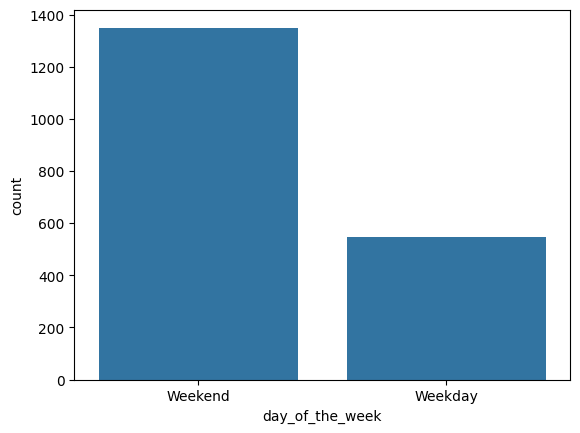

In [ ]:
sns.countplot(data=df, x='day_of_the_week')
#plt.xticks(rotation=90)
plt.show()

#### Observations: more than two thirds of orders are placed during the weekend. This shows a higher preference for ordering food during the weekend.

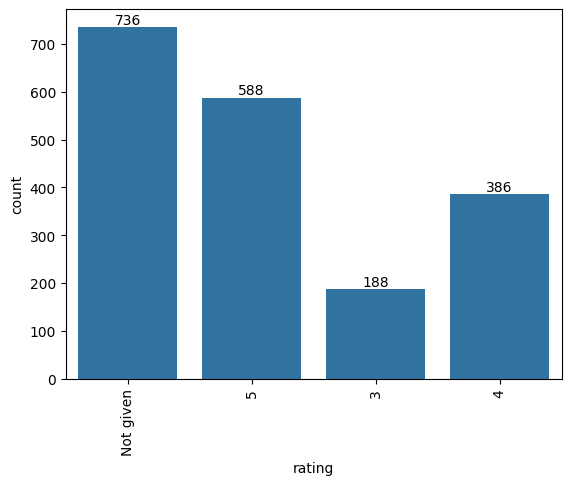

In [ ]:
ax2 = sns.countplot(data=df, x='rating')
for i in ax2.containers:
    ax2.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

#### Observations: 736 orders did not have rating, which means that there is no way to have insights on customer satisfaction for 39% of orders. Among the orders with rating (1,162), only 188 had "3" as rating. This means that a minority (16%) of customers who rated their orders gave the lowest rating in the dataset.   

In [ ]:
df['customer_id'].value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
385426,1
254913,1
289597,1


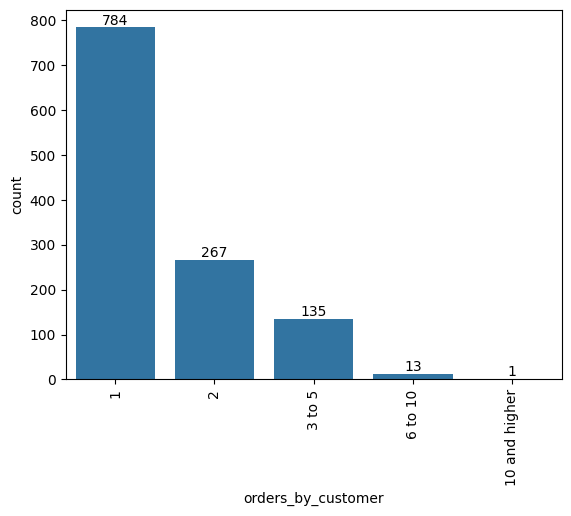

In [ ]:
customer_group = pd.cut(df['customer_id'].value_counts(), bins=[0, 1, 2, 5, 10, float('Inf')], labels=['1', '2', '3 to 5', '6 to 10', '10 and higher'])
df_customer_group = pd.DataFrame({'customers':customer_group.index, 'orders_by_customer':customer_group.values})
ax = sns.countplot(data=df_customer_group, x='orders_by_customer')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

#### Observations: 65% of customers placed only one order, which could indicate potential low frequency and/or high churn.

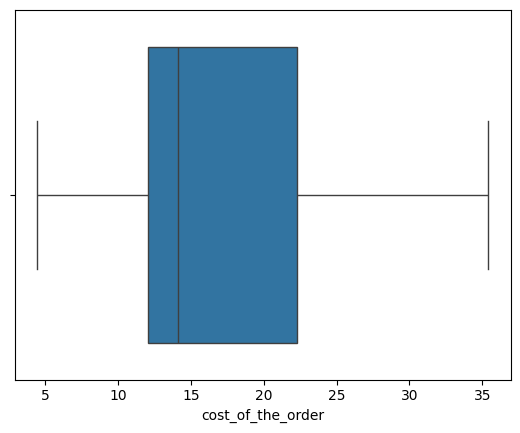

In [ ]:
sns.boxplot(data = df, x='cost_of_the_order')
plt.show()

#### Observations: all orders in the dataset are between ~ 5 and ~ 35, but 50% of orders (interquartile range) are between ~ 12 and ~ 22 dollars. There are no outliners.

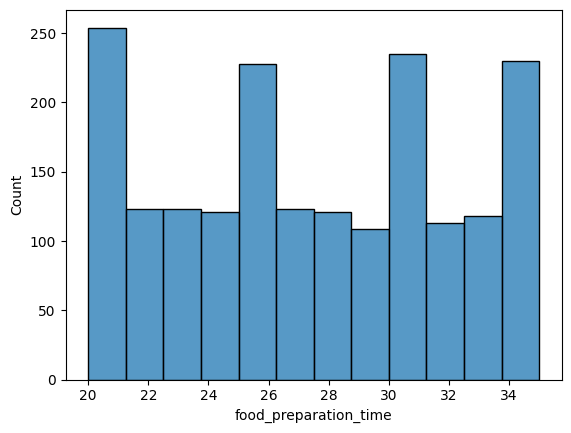

In [ ]:
sns.histplot(data = df, x='food_preparation_time')
plt.show()

#### Observations: food preparation time variable shows an odd distribution with higher frequency between 20 and 21, 25 and 26, 30 and 31, and higher than 34. Although it's hard to determine the cause with only this graph, a hyphothesis could be that certain types of restaurants that are over-represented in the dataset have a similar average preparation times that fall under these 4 buckets.

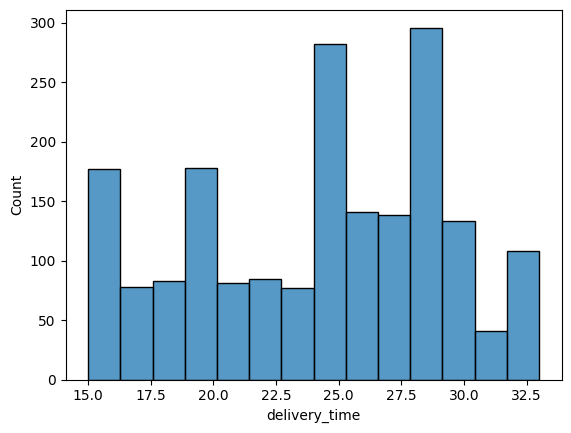

In [ ]:
sns.histplot(data = df, x='delivery_time')
plt.show()

#### Observations: similarly to food preparation time, delivery time shows a few buckets with higher frequency in the histogram. This could be caused by geographical concentration of restaurants in certain areas that have similar distance to residential areas.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


#### Observations: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the top 5 restaurants in number of orders.


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations: American is the most popular cuisine on weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
len(df[df['cost_of_the_order'] > 20])/len(df)

0.2924130663856691

#### Observations: 29.24% of orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time?

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations: the mean order delivery time is 24.16.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
df['customer_id'].value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
385426,1
254913,1
289597,1


#### Observations: the top 3 most frequent customers are: 52832 that placed 13 orders, 47440 that placed 10 orders, and 83287 that placed 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.


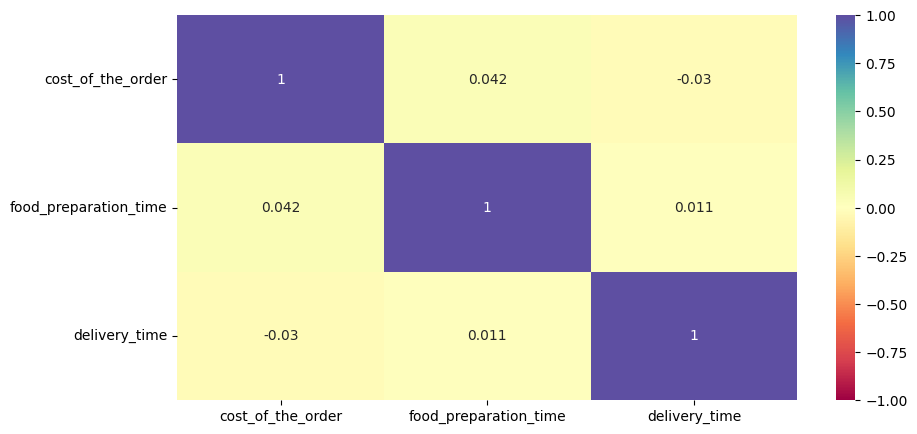

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, cmap='Spectral', vmin=-1,vmax=1)
plt.show()

#### Observations: there doesn't seem to be a strong positive or negative correlation between the numerical variables.


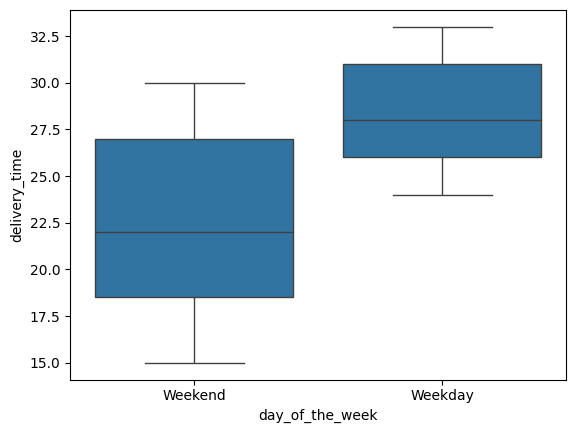

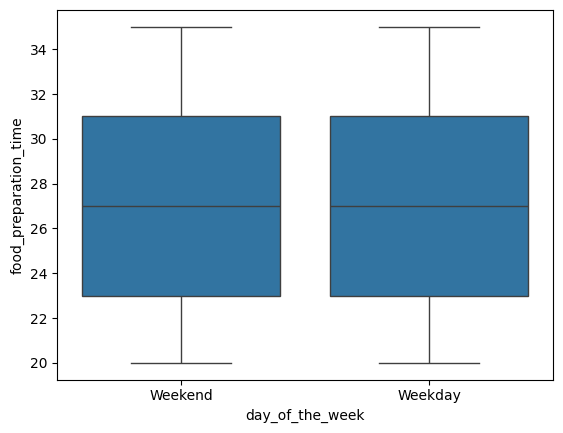

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()

#### Observations: comparing the delivery time boxplots for weekend/weekday, it's clear that the interquartile ranges have almost no overlap, with weekday having higher delivery time. The reason behind it could be related to less car traffic and/or more availability of delivery drivers during the weekend.
####At the same time, food preparation time boxplots show no difference between weekend/weekday. Therefore, day of the week seems to have a relationship with delivery time but not with preparation time.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
df2 = df[(df['rating'] != 'Not given')].copy()
df2['rating'] = pd.to_numeric(df2['rating'])
df3 = df2.groupby('restaurant_name').agg(
             rating_mean=('rating', 'mean'),
             rating_count=('rating', 'count')
)
df3[(df3['rating_mean'] > 4) & (df3['rating_count'] > 50)]

,rating_mean,rating_count
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


#### Observations: Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
def revenue(c):
  if c > 20:
    return c*0.25
  elif c > 5:
    return c*0.15
  else:
    return c*0


In [ ]:
#df['revenue'] = df['cost_of_the_order'].apply(revenue)

df['cost_of_the_order'].apply(revenue).sum()

6166.303

#### Observations: Total net revenue is 6,166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
df4 = df
df4['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
len(df4[(df4['total_delivery_time'] > 60)])/len(df4)

0.1053740779768177

#### Observations: 10.5% of orders take more than 60 minutes from the time the order is placed until delivery.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

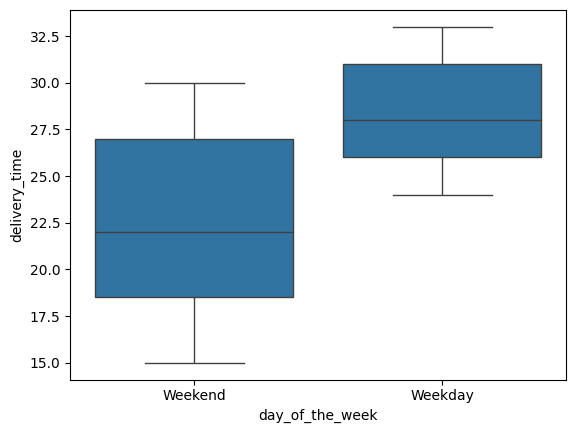

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

#### Observations: comparing the delivery time boxplots for weekend/weekday, it's clear that the interquartile ranges have almost no overlap, with weekday having higher delivery time. The mean of weekday is more than 5 minutes higher than the mean of weekend. The reason behind it could be related to less car traffic and/or more availability of delivery drivers during the weekend.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
*   The most popular cusines are Japanese, American, Italian, and Chinese
*   The majority of orders (50% - interquartile range) are between ~ 12 and ~ 22 dollars
*   There is a high number of orders (39%) that have no rating, which means there is no way to assess customer satisfaction for those orders
*   65% of customers placed only one order, which could indicate potential low frequency and/or high churn
*   Orders take longer (+5 minutes) to be delivered during weekdays

### Recommendations:

*   The company could use offers to encourage customers to spend more for the most popular cuisines; for instance, get a free item for Japanese, American, Italian or Chinese restaurants when spending 25 dollars or more because most orders are between 12 and 22 dollars
*   Send messages incentivizing customers to rate their orders right after their purchases are completed to see if more customers rate their offers
*   Investigate the reason for the majority of customers not placing more than one order
*   Investigate why orders take longer to be delivered during weekdays and take necessary actions - for example, if orders are taking longer during weekdays due to lack of delivery drivers, provide higher service payment to drivers during weekdays

---